In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sp
from scipy import sparse
from scipy.spatial import cKDTree
from matplotlib.animation import FuncAnimation

In [2]:
def Force(ri, rj, R0, Req, Fadh, Frep):
    
    if ri[0] == rj[0] and ri[1] == rj[1]:
        
        return 0
    
    a = rj-ri
    dij = ((a[0])**2 + (a[1])**2)**(1/2)
    
    eij = a/dij
    
    if dij < Req:
        
        return eij*(Frep*((dij-Req)/Req))
    
    elif dij <= R0:
        
        return eij*(Fadh*((dij-Req)/(R0-Req)))
    
    else:
        return np.array([0,0])
    

In [3]:
def Force2(ri, rj, Req, Frep):
    
    if ri[0] == rj[0] and ri[1] == rj[1]:
        
        return 0
    
    a = rj-ri
    dij = ((a[0])**2 + (a[1])**2)**(1/2)
    
    eij = a/dij
    
    if dij < Req:
        
        return eij*(Frep*((dij-Req)/Req))
    
    else:
        return np.zeros((2))
    

In [4]:
def Order_Parameter(N,x):
    
    A = ((x[0])**2 + (x[1])**2)**(1/2)
    
    return (A/N)

In [5]:
def Wall_Force(ri, S, R0, Fw):
    
    n1 = np.array([0,-1])
    n2 = np.array([-1,0])
    n3 = np.array([0,1]) 
    n4 = np.array([1,0])
    
    if ri[0] < R0:
        
        Fw1 = n2*(-Fw*np.exp(-2*abs(ri[0])/R0))
        
    else:
        
        Fw1 = 0
        
    if ri[1] < R0:
        
        Fw2 = n1*(-Fw*np.exp(-2*abs(ri[0])/R0))
        
    else:
        Fw2 = 0
        
    if ri[0] > S-R0:
        
        dwx = abs(S-ri[0])
        Fw3 = n4*(-Fw*np.exp(-2*dwx/R0))
        
    else:
        
        Fw3 = 0
        
    if ri[1] > S-R0:
        
        dwy = abs(S-ri[1])
        Fw4 = n3*(-Fw*np.exp(-2*dwy/R0))
        
    else:
        
        Fw4 = 0
        
    return Fw1+Fw2+Fw3+Fw4

In [6]:
i = np.array([1,1])
j = np.array([1,0.5])

ans = Force(i, j, 1, 5/6, 0.75, 30)

print(ans)

[-0. 12.]


In [7]:
theta = np.pi
N = 2
S = 100

intitial_positions = S*np.random.rand(N,2)

print(intitial_positions)


n = np.array([np.cos(theta), np.sin(theta)])

eta = 2*np.pi*np.random.rand(1)

v0 = 1
mu = 1
ri = np.array([1,0])
rj = np.array([1,0.75])
R0 = 1
Req = 5/6
Fadh = 0.75
Frep = 30

dr = v0*n + mu*Force(ri, rj, R0, Req, Fadh, Frep)
print(F)

argdr = np.arctan2(dr[1], dr[0])

d0 = np.arctan2(n[1], n[0]) - argdr + eta

print(d0)
print(eta)
print(np.arctan2(n[1], n[0]) - argdr)



[[86.64271117  9.66837757]
 [50.31314858 56.92717568]]


NameError: name 'F' is not defined

In [8]:
R0 = 1
Req = 5/6
Fadh = 0.75
Frep = 30
mu = 1
eta1 = 0.25*np.pi
v0 = 1
dt = 0.01 
S = 5
N = 5
theta = 2*np.pi*np.random.random_sample(size = N) # initial angles

positions = S*np.random.rand(N,2)

print(theta)
print(positions)
#print(positions[2])
                                      
for t in range(N):
    
    Newpos = np.zeros((N,2))
    Newtheta = np.zeros((N,1))
    ri = positions[t] 
    #print(ri)
    TotF = np.array([0,0])
    
    for u in range(N):
        #print(t)
        rj = positions[u]
        
        if u != t:
            #print(u)
            #print(rj)
            F = Force(ri, rj, R0, Req, Fadh, Frep)
            #print(F)
            Total = ([TotF[0] + F[0], TotF[1]+F[1]])
            TotF = Total
            #print(TotF)
        else:
            continue
    
    #print(TotF)
    xa = np.cos(theta[t])
    ya = np.sin(theta[t])
    n = np.array([xa, ya])
    dr = dt*(v0*n + mu*TotF)
    
    if positions[t][0] <= 0 or positions[t][0] >= S:
        dr[0] *= -1
        
    if positions[t][1] <= 0 or positions[t][1] >= S:
        dr[1] *= -1
    
        
    #print(TotF)
    #print(n)
    #print(v0*n)
    #print(dr)
    #print(v0*n)
    #print(n)
    rnad = random.choice([-1, 1])
    eta = rnad*eta1*np.random.rand(1)
    
    vector_neighbour = np.array([dr[0], dr[1]])
    vector_centre = np.array([n[0], n[1]])
    product = vector_neighbour*vector_centre
    dot_product = product[0] + product[1]
                
    mod_neighbour = np.sqrt((dr[0])**2 + (dr[1])**2)
    mod_centre = np.sqrt((n[0])**2 + (n[1])**2)
    h = dot_product/(mod_centre*mod_neighbour) - 0.0000000000000003
                    
    angle_diff = np.arccos(h) + eta
    #print(np.arctan2(n[1], n[0]))
    #print(theta[t])
    #print(d0) 
    #print(theta[t])
    
    
    
    Newpos[t] = positions[t] + dr
    positions[t] = Newpos[t]
    
    Newtheta[t] = theta[t] + angle_diff
    theta[t] = Newtheta[t]

print(theta)
print(positions)



[0.42136939 2.96956446 3.77707385 0.88643111 2.55211713]
[[0.80839403 1.44418183]
 [1.11177809 1.59622899]
 [3.75031464 1.26366054]
 [2.471036   3.08606125]
 [4.16965379 1.67649978]]
[2.90212315 4.88416848 4.5814929  1.02637981 3.69527416]
[[0.65853513 1.36859373]
 [1.2068461  1.65063568]
 [3.67944646 1.1958783 ]
 [2.47735782 3.09380946]
 [4.19908299 1.71906253]]


In [9]:
theta = 2*np.pi*np.random.rand(N, 1)
print(theta)
n = np.array([np.cos(theta[1]), np.sin(theta[1])])
print(n)
#print(n[1])
#print(np.cos(theta))

[[2.2233698 ]
 [4.87869122]
 [2.58695922]
 [3.08704109]
 [3.30549835]]
[[ 0.16553674]
 [-0.98620362]]


In [10]:
# Boudary conditions:
# Walls along x = 0, y = 0, x = S, y = S
# If at x = 0 or at x < 0, then x --> -x 

In [11]:
a = np.array([3,2,3,2,3,2])
print(a)

[3 2 3 2 3 2]


 N 3072
1


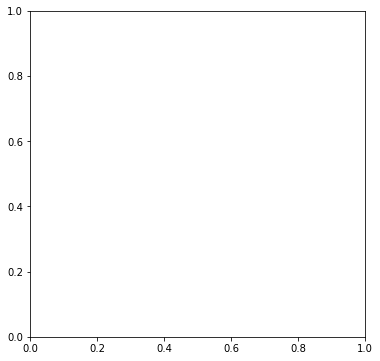

In [128]:
L = 32.0
rho = 3.0
N = int(rho*L**2)
print(" N",N)
 
r0 = 1.0
deltat = 1.0
factor =0.5
v0 = r0/deltat*factor
iterations = 10000
eta = 0.15
 
pos = np.random.uniform(0,L,size=(N,2))
orient = np.random.uniform(-np.pi, np.pi,size=N)
 
fig, ax= plt.subplots(figsize=(6,6))
 
qv = ax.quiver(pos[:,0], pos[:,1], np.cos(orient[0]), np.sin(orient), orient, clim=[-np.pi, np.pi])
 
def animate(i):
    print(i)
    ax.clear()
 
    global orient
    tree = cKDTree(pos,boxsize=[L,L])
    dist = tree.sparse_distance_matrix(tree, max_distance=r0,output_type='coo_matrix')
 
    #important 3 lines: we evaluate a quantity for every column j
    data = np.exp(orient[dist.col]*1j)
    # construct  a new sparse marix with entries in the same places ij of the dist matrix
    neigh = sparse.coo_matrix((data,(dist.row,dist.col)), shape=dist.get_shape())
    # and sum along the columns (sum over j)
    S = np.squeeze(np.asarray(neigh.tocsr().sum(axis=1)))
     
     
    orient = np.angle(S)+eta*np.random.uniform(-np.pi, np.pi, size=N)
 
 
    cos, sin= np.cos(orient), np.sin(orient)
    pos[:,0] += cos*v0
    pos[:,1] += sin*v0
 
    pos[pos>L] -= L
    pos[pos<0] += L
 
    qv.set_offsets(pos)
    qv.set_UVC(cos, sin,orient)
    return qv,

anim = FuncAnimation(fig,animate,np.arange(1, 200),interval=1, blit=True)
plt.show()

Density = 0.4444444444444444
Normalized density = 0.2222222222222222


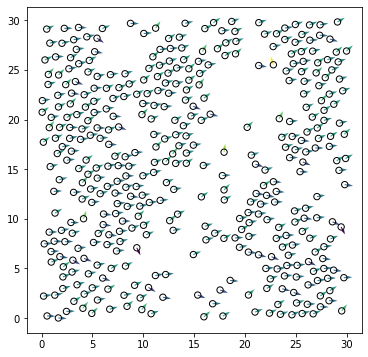

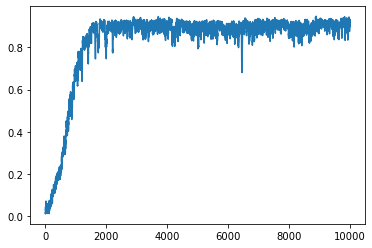

In [17]:
# !!!!!!!!!!!! Periodic Boundary Conditions !!!!!!!!!!!!!!!!!!!!
R0 = 1
Req = 1.01
Fadh = 0.75 # Attractive forces when sufficiently close
Frep = 30  # Repulsive forces when too close
v0 = 1  # constant velocity of particles
mu = 1 # cell mobility
dt = 0.05*(R0/v0) # time-step value
zeta1 = 0.6/(2*np.sqrt(dt))  # noise term scaling factor
tau = 1 # relaxation time
S = 30  # size of box
N = 400  # Number of particles
theta = 2*np.pi*np.random.random_sample(size = N) # initial angles
Ndt = 10000 # Number of time steps
density = N/(S/R0)**2
print('Density =', density)
print('Normalized density =', density/2)

positions = S*np.random.rand(N,2)
#print(theta)
#print(positions)
#plt.scatter(positions[:,0], positions[:,1])
tot = []
for i in range(Ndt):
    
    Newpos = np.zeros((N,2))
    Newtheta = np.zeros((N))
    totvi = np.zeros(3)
    
    for t in range(N):
        
        ri = positions[t] 
        #print(t)
        TotF = np.zeros((2))
        #print(TotF)
        
        for u in range(N):
            #print(t)
            rj = positions[u]
            #print(u)
            #print(rj)
            F = Force(ri, rj, R0, Req, Fadh, Frep) 
            #print(F)
            Total = TotF+F
            TotF = Total
            #print(TotF)
            
        
        #print(TotF)
            
        #print('t =', t)
        #print(theta[t])
        xa = np.cos(theta[t])
        ya = np.sin(theta[t])
        #print('xa =',xa)
        #print('ya =',ya)
        n = np.array([xa, ya])
        #print('n =', n)
        dr = dt*(v0*n + mu*TotF)
        #print('dr =', dr)    
        eta = zeta1*(np.random.uniform(-1,1))
        
        vi = np.array([dr[0],dr[1],0])/dt   # Finding angle change
        norm_vi = np.linalg.norm(vi)
        x = totvi + vi/norm_vi
        ni = np.array([n[0],n[1],0])
        #print('vi =', vi)
        #print('ni =', ni)
        c = np.cross(ni,vi/norm_vi)
        d0 = (dt/tau)*(np.arcsin(c[2]) + eta)
        
        Newpos[t] += positions[t] + dr
        if Newpos[t][0] < 0:
            Newpos[t][0] += S
            
        if Newpos[t][1] < 0:
            Newpos[t][1] += S
            
        if Newpos[t][0] > S:
            Newpos[t][0] -= S
            
        if Newpos[t][1] > S:
            Newpos[t][1] -= S
        
        Newtheta[t] += theta[t] + d0
        totvi = x
        
    positions = Newpos
    theta = Newtheta
    #print(x)
    Totvi = Order_Parameter(N, totvi)
    #print(i)
    #print('Order =', Totvi)
    tot.append(Totvi)
    #plt.figure(figsize=(6,6))
    #plt.quiver(positions[:,0], positions[:,1], np.sin(theta), np.cos(theta), np.arctan2(np.cos(theta), np.sin(theta)), scale = 40, headaxislength = 5, facecolors='0', edgecolors='b')
    #plt.scatter(positions[:,0], positions[:,1], s = 40, facecolors='none', edgecolors='0')
    #plt.show()

#print(theta)
#print(positions)
np.savetxt('1Mathsbio1.csv', tot, delimiter=',')
plt.figure(figsize=(6,6))
plt.quiver(positions[:,0], positions[:,1], np.sin(theta), np.cos(theta), np.arctan2(np.cos(theta), np.sin(theta)), scale = 40, headaxislength = 5, facecolors='0', edgecolors='b')
plt.scatter(positions[:,0], positions[:,1], s = 40, facecolors='none', edgecolors='0')
plt.show()

k = np.linspace(0,Ndt-1,Ndt)
plt.plot(k, tot)

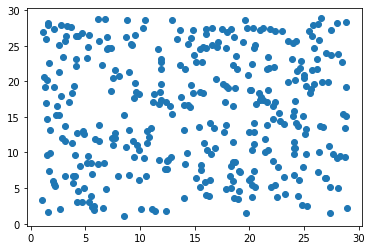

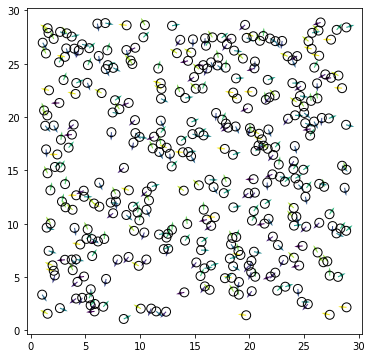

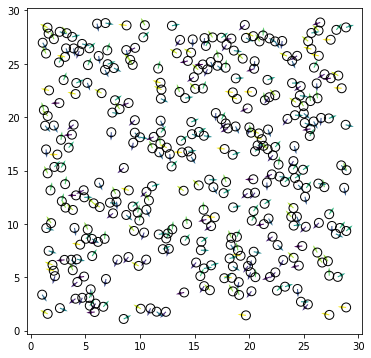

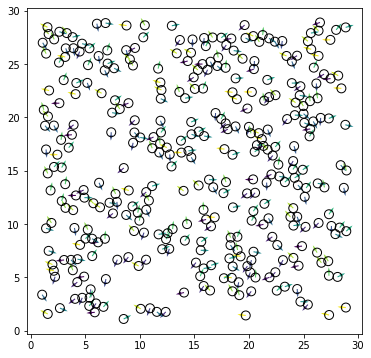

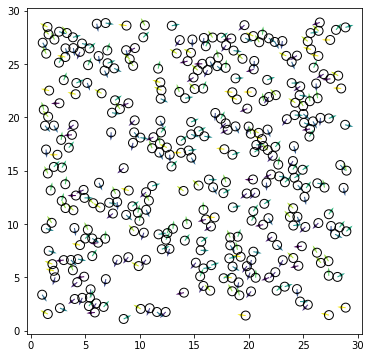

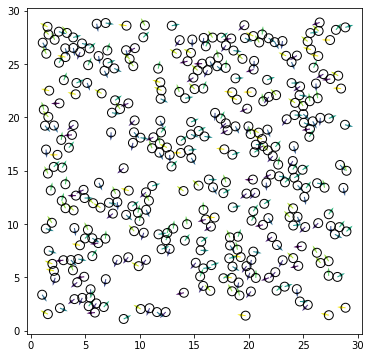

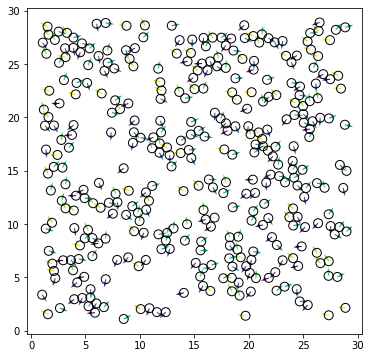

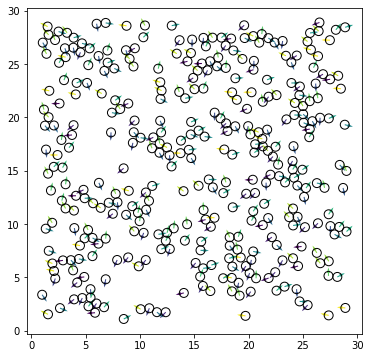

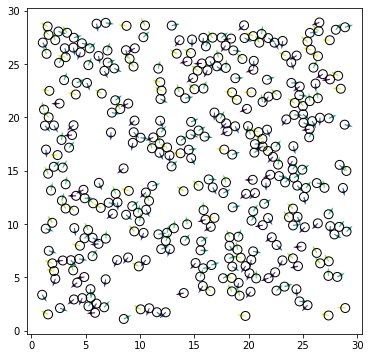

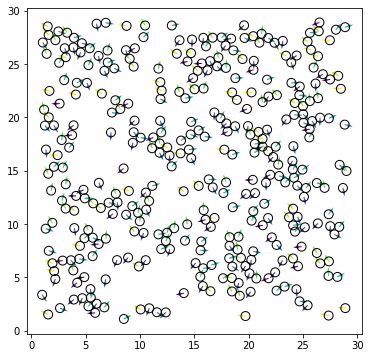

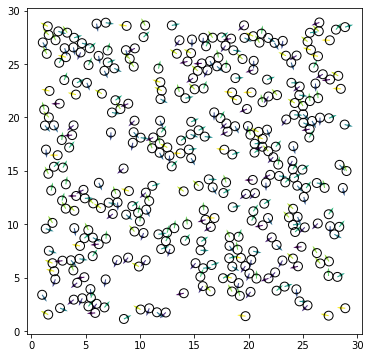

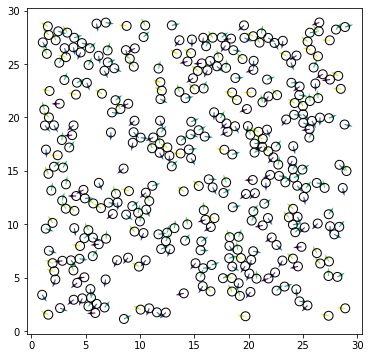

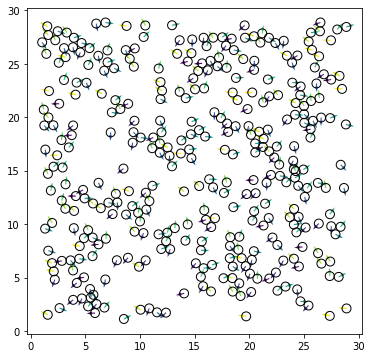

KeyboardInterrupt: 

In [57]:
# !!!!!!!!!!!!!!!! Fixed Wall Boundary Conditions !!!!!!!!!!!!!!!!!!!!!!!!
R0 = 1
Req = 5/6
Fadh = 0.75 # Attractive forces when sufficiently close
Frep = 30  # Repulsive forces when too close
Fw = 20
eta1 = 0.05*np.pi  # noise term scaling factor
v0 = 1  # constant velocity of particles
mu = 1 # cell mobility
dt = 0.005*(R0/v0) # time-step value
tau = 1 # relaxation time
S = 30  # size of box
N = 350  # Number of particles
theta = 2*np.pi*np.random.random_sample(size = N) # initial angles
Ndt = 1000 # Number of time steps

positions = np.random.uniform(1,S-1, size=(N,2))
#print(theta)
#print(positions)
plt.scatter(positions[:,0], positions[:,1])
tot = []
for i in range(Ndt):
    
    Newpos = np.zeros((N,2))
    Newtheta = np.zeros((N))
    totvi = np.array([0,0,0])
    
    for t in range(N):
        
        ri = positions[t] 
        #print(ri)
        TotF = np.array([0,0])
        
        for u in range(N):
            #print(t)
            rj = positions[u]
            #print(u)
            #print(rj)
            F = Force(ri, rj, R0, Req, Fadh, Frep) + Wall_Force(ri, S, R0, Fw)
            #print(F)
            Total = np.add(TotF, F)
            TotF = Total
            #print(TotF)
            
        #print('t =', t)
        #print(theta[t])
        xa = np.cos(theta[t])
        ya = np.sin(theta[t])
        #print('xa =',xa)
        #print('ya =',ya)
        n = np.array([xa, ya])
        #print('n =', n)
        dr = dt*(v0*n + mu*TotF)
        #print('dr =', dr)
        rnad = random.choice([-1, 1])    
        eta = rnad*eta1*np.random.rand(1)
        
        vi = np.array([dr[0],dr[1],0])/dt   # Finding angle change
        norm_vi = np.linalg.norm(vi)
        x = np.add(totvi, vi/norm_vi)
        ni = np.array([n[0],n[1],0])
        #print('vi =', vi)
        #print('ni =', ni)
        c = np.cross(ni,vi/norm_vi)
        d0 = (dt/tau)*(np.arcsin(c[2]) + eta)
        
        Newpos[t] += positions[t] + dr
        
        
        Newtheta[t] += theta[t] + d0
        totvi = x
        
    positions = Newpos
    theta = Newtheta
    #print(x)
    Totvi = Order_Parameter(N, totvi)
    #print(i)
    #print('Order =', Totvi)
    tot.append(Totvi)
    #plt.figure(figsize=(6,6))
    #plt.quiver(positions[:,0], positions[:,1], np.sin(theta), np.cos(theta), np.arctan2(np.cos(theta), np.sin(theta)), scale = 40, headaxislength = 5, facecolors='0', edgecolors='b')
    #plt.scatter(positions[:,0], positions[:,1], s = 40, facecolors='none', edgecolors='0')
    #plt.show()

#print(theta)
#print(positions)
plt.figure(figsize=(6,6))
plt.quiver(positions[:,0], positions[:,1], np.sin(theta), np.cos(theta), np.arctan2(np.cos(theta), np.sin(theta)), scale = 40, headaxislength = 5, facecolors='0', edgecolors='b')
plt.scatter(positions[:,0], positions[:,1], s = 40, facecolors='none', edgecolors='0')
plt.show()

k = np.linspace(0,Ndt-1,Ndt)
plt.plot(k, tot)

In [28]:
# Further interesting examples for the collective motion of tissue cells are related to the following two processes:
# Tissue repair and wound healing. In tissue repair, collective migration is seen in vascular sprouts penetrating the wound or
# the horizontal migration of epithelial cell-sheets across 2d substrates upon self-renewal of keratinocytes migrating across
# the wound (Friedl, 2004). In epithelial tissue, the opening of a gap induces the proliferation and movement of the surrounding
# intact cells, which eventually closes the gap. Környei et al. (2000) studied the responses of artificially mechanically 
# injured astrocytes (a characteristic star-shaped glial cell in the central nervous system) in vitro. In particular, the 
# changes in the cellmotility, proliferation and morphology were analyzed. Their data suggested that the mechanical injury 
# (basically a ‘‘scratch’’) was not sufficient to indicate changes in the motility of the astroglia cell, but did result in 
# a local enhancement in the cell proliferation.